## Decision Tree

### Regression problem

Dataset link : https://www.kaggle.com/balakrishcodes/others

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(r"F:\Priyanaka\Dataset\Movie_regression data.csv",header=0)
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [4]:
##In time_taken coloumn ,there is missing value.

## Imputation

In [6]:
df["Time_taken"].mean()

157.39149797570855

In [8]:
df["Time_taken"].fillna(value = df["Time_taken"].mean(), inplace = True )

In [9]:
df.isnull().sum()

Marketing expense      0
Production expense     0
Multiplex coverage     0
Budget                 0
Movie_length           0
Lead_ Actor_Rating     0
Lead_Actress_rating    0
Director_rating        0
Producer_rating        0
Critic_rating          0
Trailer_views          0
3D_available           0
Time_taken             0
Twitter_hastags        0
Genre                  0
Avg_age_actors         0
Num_multiplex          0
Collection             0
dtype: int64

## Dummy variable creation

In [11]:
df = pd.get_dummies(df, columns= ["3D_available","Genre"],drop_first = True)

In [12]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,48000,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,43200,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,69400,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,66800,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,72400,0,0,1,0


In [13]:
## choose x and y

In [15]:
X = df.loc[:,df.columns!="Collection"]
y = df["Collection"]

## Splitting

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [17]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 19)
(102, 19)
(404,)
(102,)


## Regression Tree

In [18]:
from sklearn import tree
reg_tree = tree.DecisionTreeRegressor(max_depth = 3)

In [19]:
reg_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [20]:
y_train_pred = reg_tree.predict(X_train)
y_test_pred  = reg_tree.predict(X_test)

## model performance

In [21]:
from sklearn.metrics import mean_squared_error,r2_score

In [22]:
mean_squared_error(y_test,y_test_pred)

117077216.27161306

In [23]:
r2_score(y_train,y_train_pred)

0.8364651040556869

In [24]:
r2_score(y_test,y_test_pred)

0.636321038122745

## plotting decision Tree

In [25]:
dot_data = tree.export_graphviz(reg_tree,out_file=None,feature_names=X_train.columns,filled=True)

In [26]:
from IPython.display import Image

In [27]:
import pydotplus

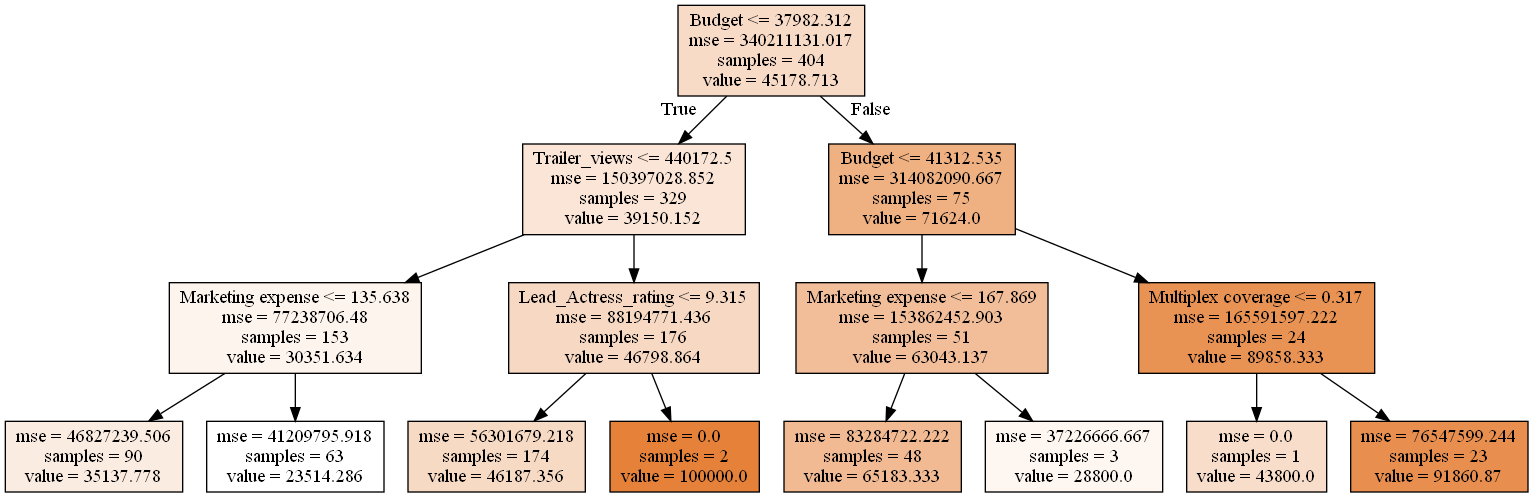

In [28]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Controlling Tree growth

### Maximum depth of tree

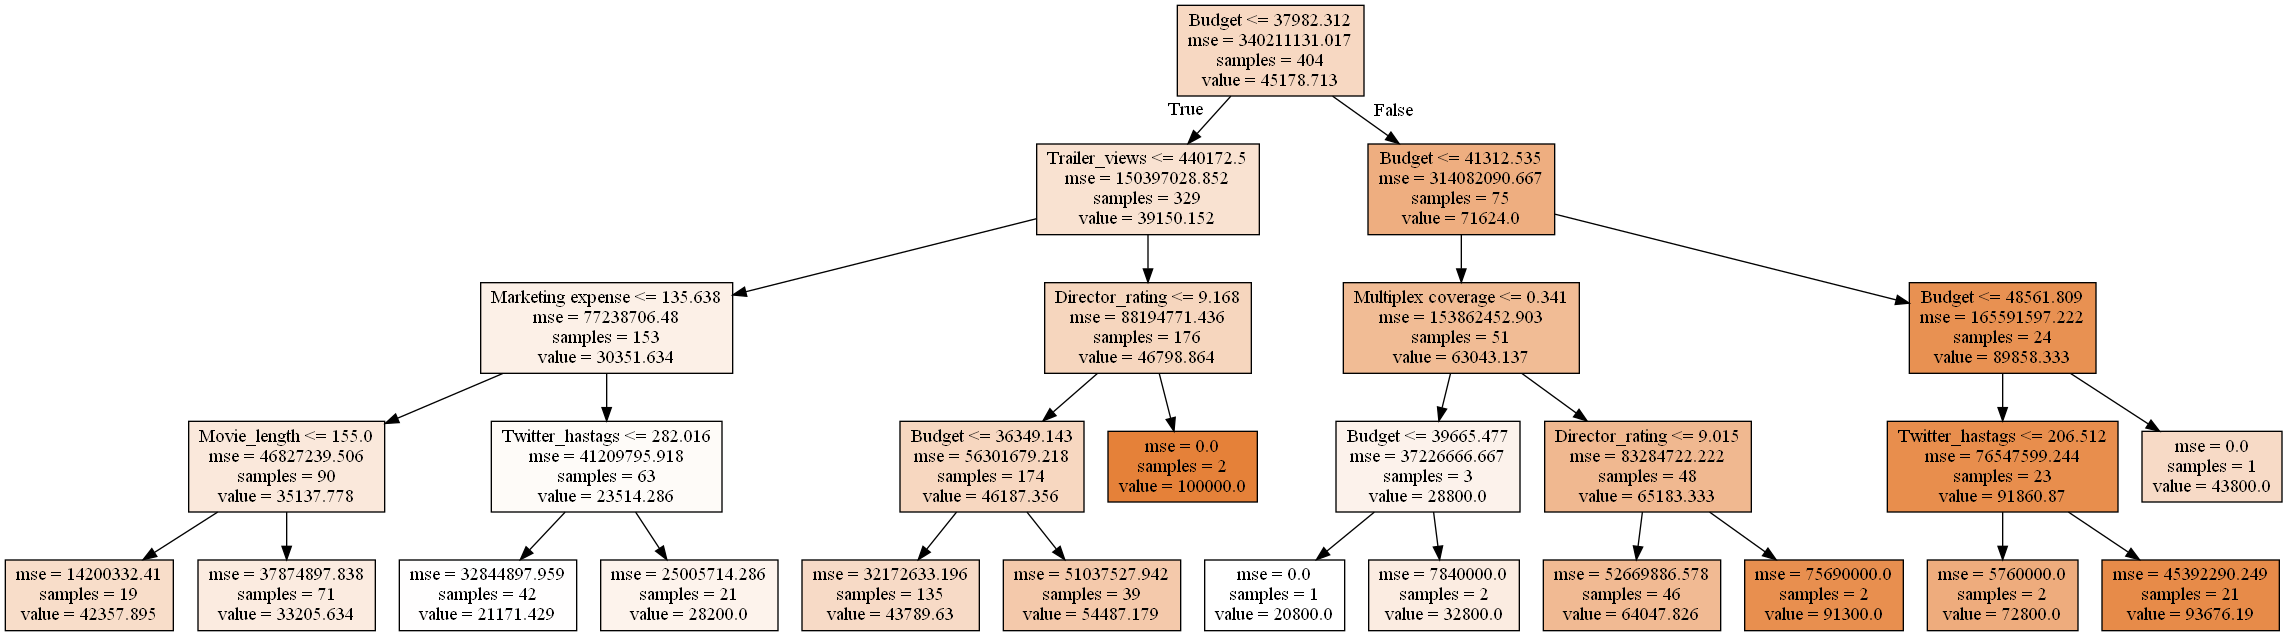

In [29]:
reg_tree1 = tree.DecisionTreeRegressor(max_depth = 4)
reg_tree1.fit(X_train,y_train)
dot_data1 = tree.export_graphviz(reg_tree1,out_file=None,feature_names=X_train.columns,filled=True)
graph1 = pydotplus.graph_from_dot_data(dot_data1)
Image(graph1.create_png())

## Minimum observations at internal node

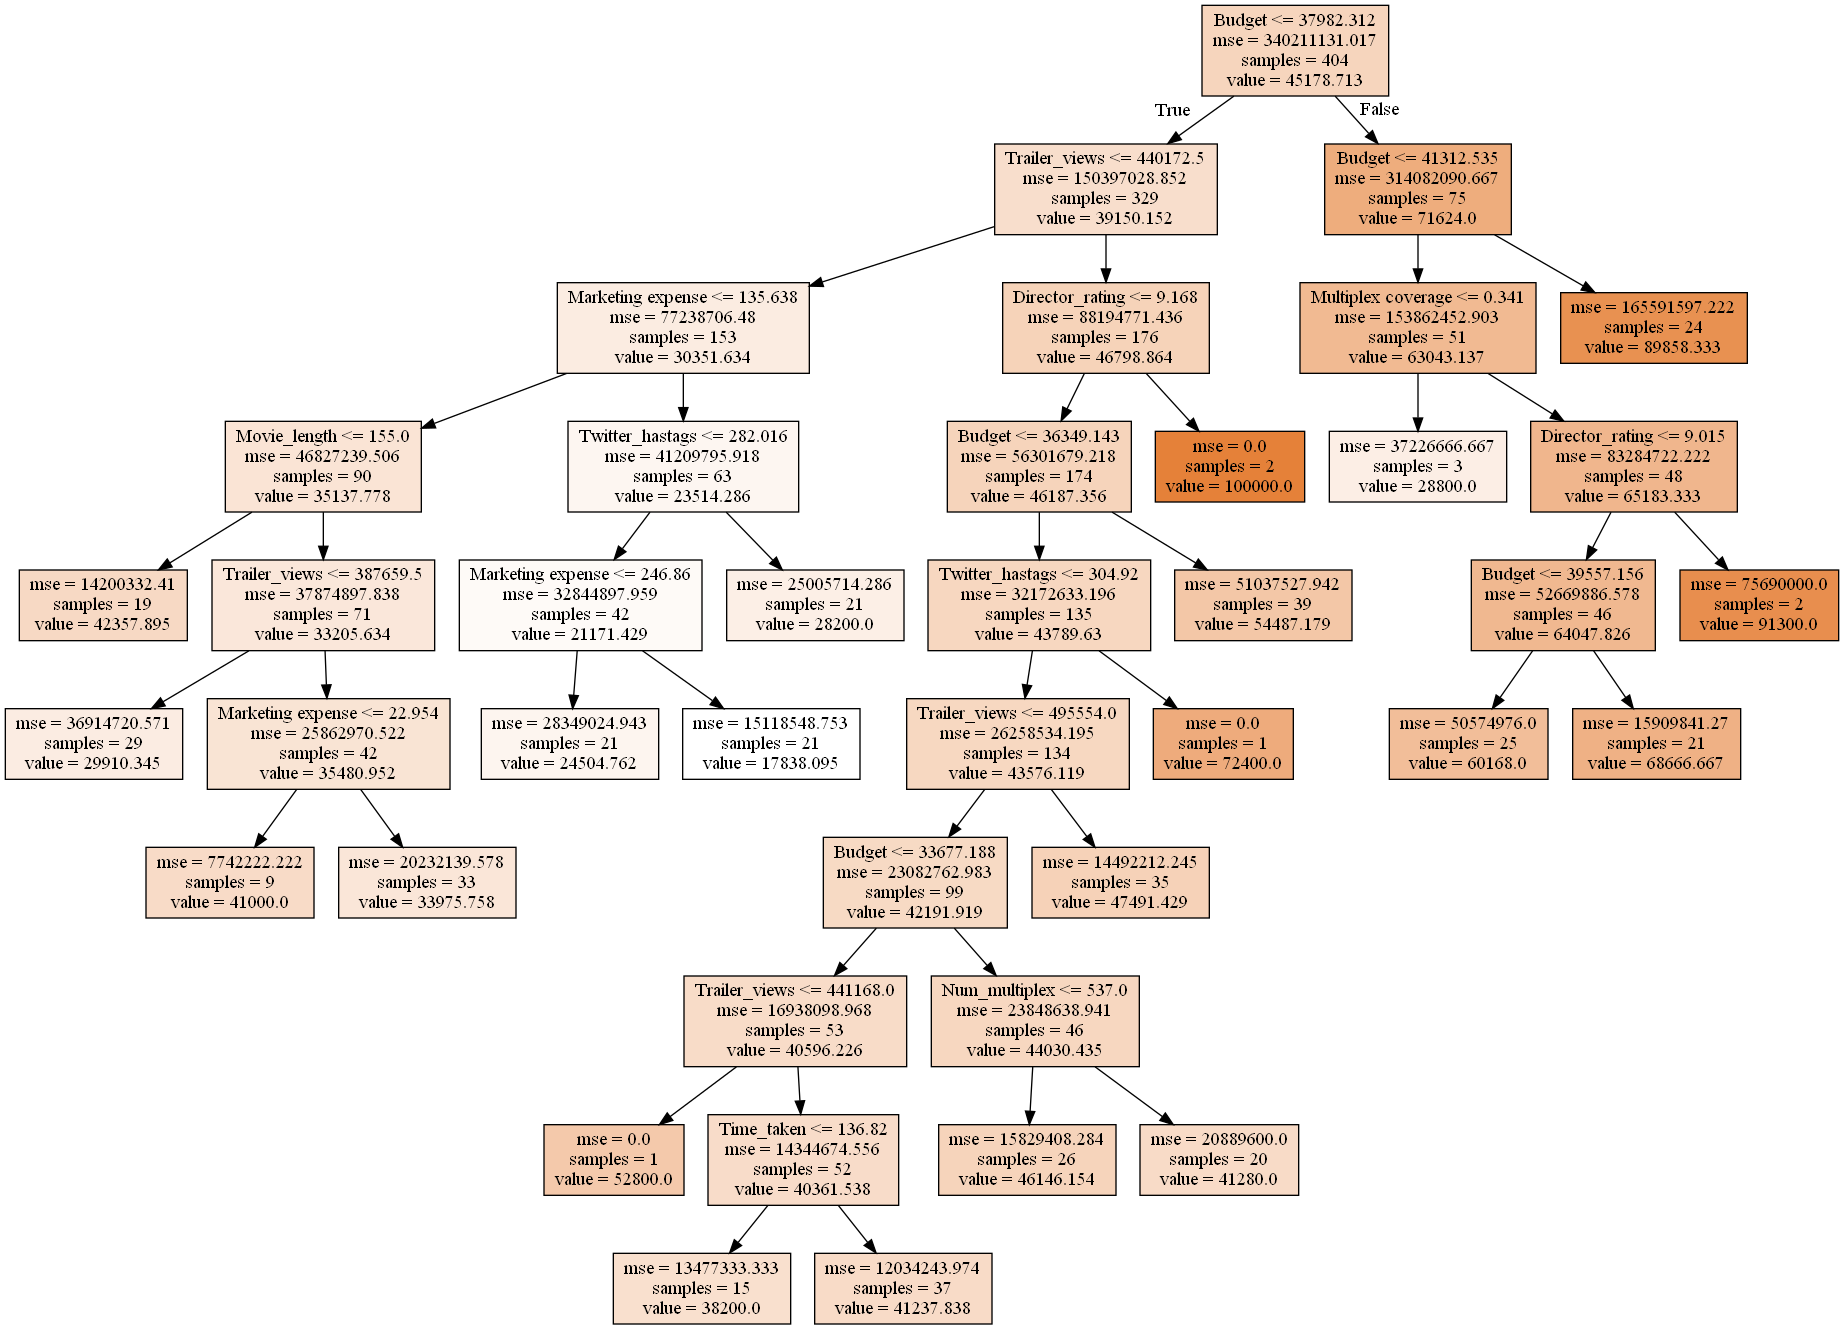

In [30]:
regtree2 = tree.DecisionTreeRegressor(min_samples_split = 40)
regtree2.fit(X_train, y_train)
dot_data = tree.export_graphviz(regtree2, out_file=None,feature_names= X_train.columns, filled = True)
graph2 = pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

## Minimum observations at leaf node

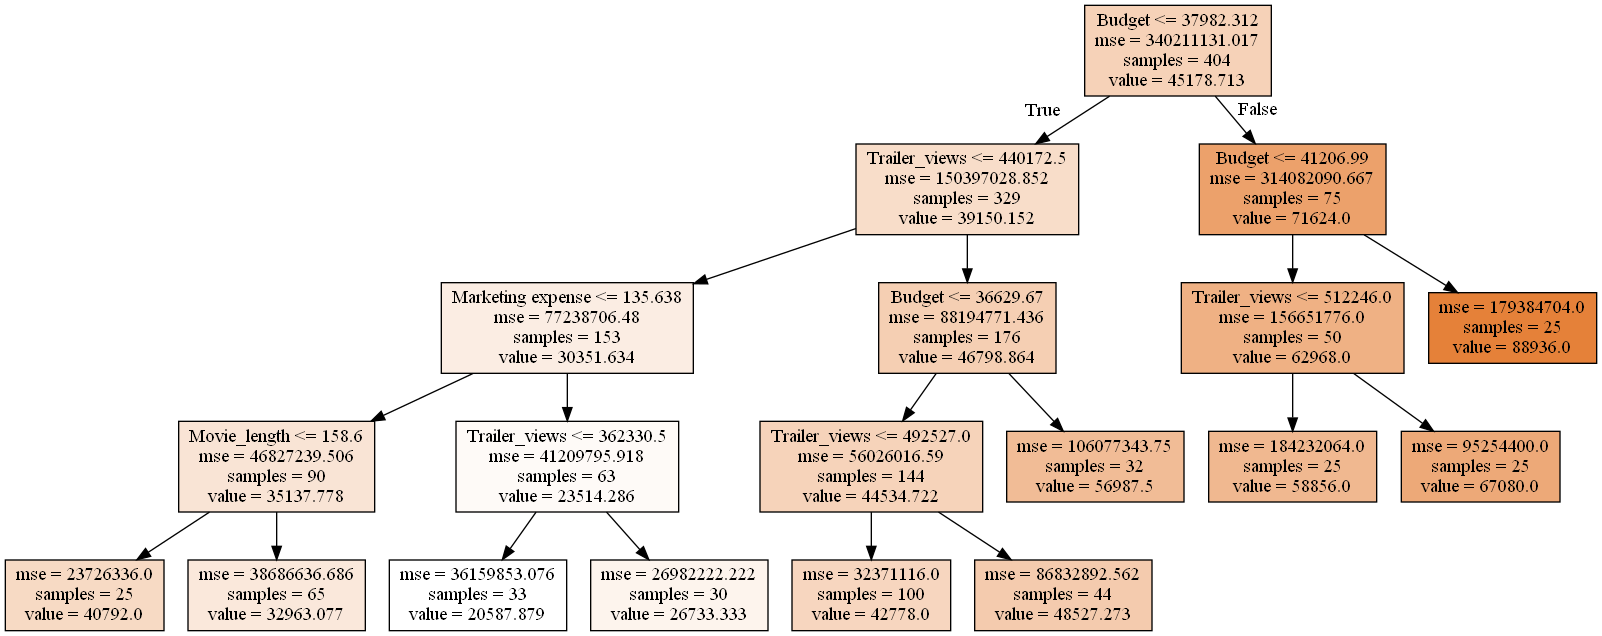

In [31]:
regtree3 = tree.DecisionTreeRegressor(min_samples_leaf = 25, max_depth=4)
regtree3.fit(X_train, y_train)
dot_data = tree.export_graphviz(regtree3, out_file=None,feature_names= X_train.columns, filled = True)
graph3 = pydotplus.graph_from_dot_data(dot_data)
Image(graph3.create_png())